In [1]:
%cd C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor
from src.utils.cross_validation import CrossValidation
from src.models.random_forest_regression import RandomForestRegression

import pandas as pd
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor


In [2]:
ds = xr.load_dataset(r'C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor\data\intermediate\CV_results\performance_cube_final_noERA5.nc')
ds = ds.squeeze()
ds = ds.mean(dim='cv_fold')
df = ds.to_dataframe().reset_index()
df

,max_depth,min_samples_leaf,max_features,mse,n_estimators,min_samples_split
0,10,100,0.25,0.003477,30,400
1,10,100,0.5,0.003432,30,400
2,10,100,0.75,0.003431,30,400
3,10,200,0.25,0.003462,30,400
4,10,200,0.5,0.003428,30,400
5,10,200,0.75,0.003413,30,400
6,10,400,0.25,0.003510,30,400
7,10,400,0.5,0.003427,30,400
8,10,400,0.75,0.003424,30,400
9,10,50,0.25,0.003479,30,400


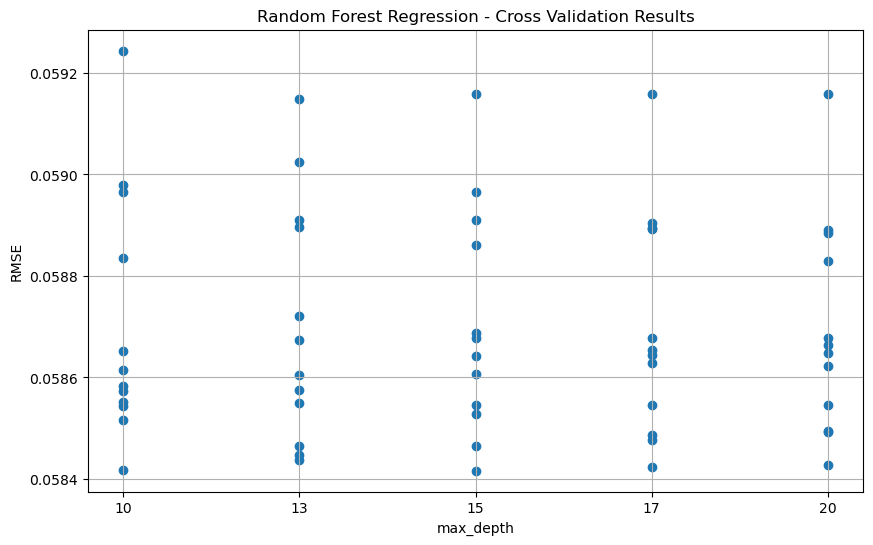

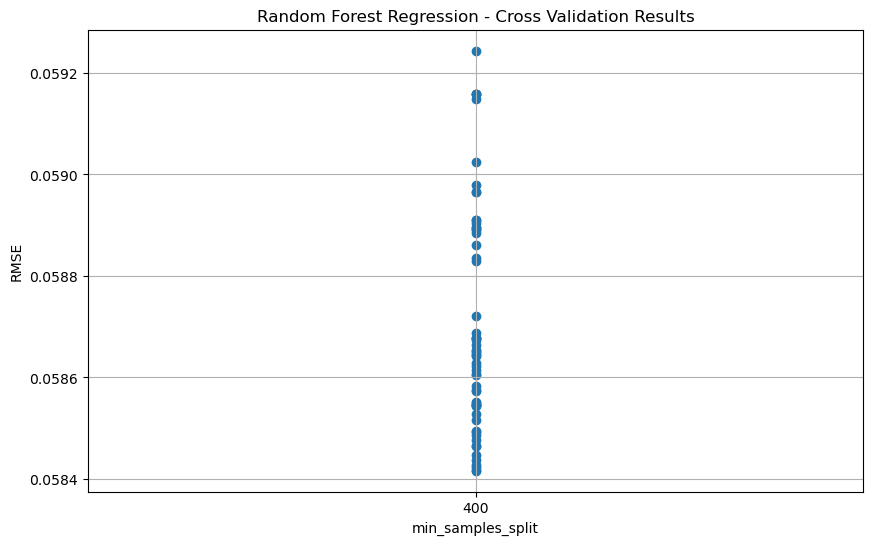

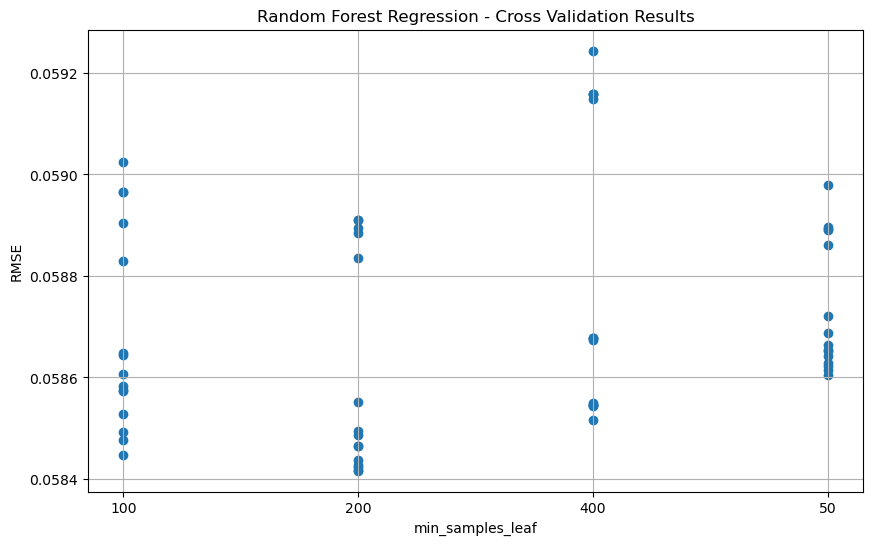

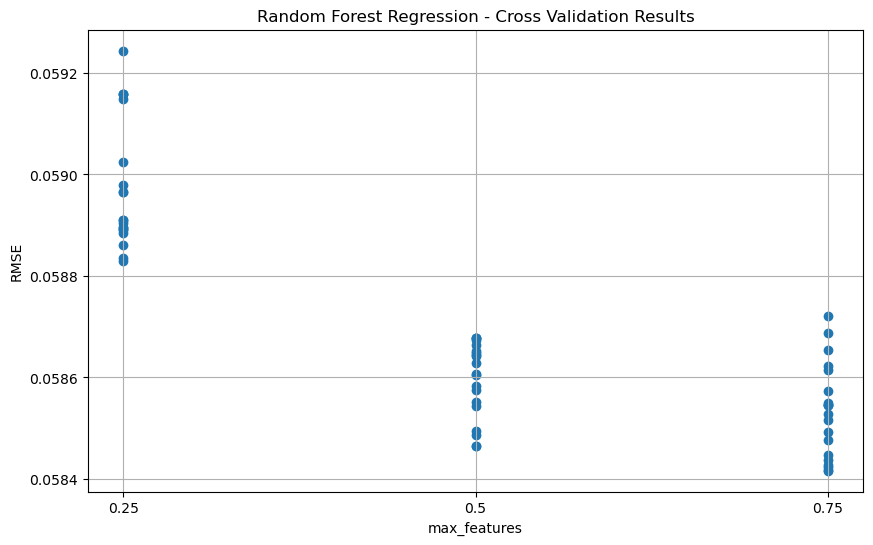

In [3]:
tunes = ['max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features']

for tune in tunes:
    plt.figure(figsize=(10,6))
    plt.scatter(df[tune], df['mse']**0.5, marker='o', label=tune)
    plt.xlabel(tune)
    plt.ylabel('RMSE')
    plt.title('Random Forest Regression - Cross Validation Results')
    plt.grid()
    #plt.ylim(0.059, 0.062)
    plt.show()

In [4]:
def reverse_xarray_selection_to_params(x):
    """
    Given e.g. x = ds.mse.sel(...)
    return the corresponding Python param dict, restoring types:
      "None" → None
      "10"   → int(10)
      "3.14" → float(3.14)
      everything else stays as string.
    """
    # If user passed Dataset/DataArray — ensure 0-D DataArray

    params = {}
    for dim, raw in x.coords.items():
        v = raw.item()  # Python scalar

        # --- unstringify back to meaningful Python literal ---
        if v == "None":
            params[dim] = None
        else:
            try:
                params[dim] = int(v)
            except (ValueError, TypeError):
                try:
                    params[dim] = float(v)
                except (ValueError, TypeError):
                    params[dim] = v  # leave as string
    
    x_out = x.values.squeeze()  # 0-D DataArray to scalar
    return params, float(x_out)

In [5]:
ds = xr.load_dataset(r'C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor\data\intermediate\CV_results\performance_cube_3.nc')
ds = ds.squeeze()
mean = ds.mean(dim='cv_fold')
best_idx = mean.where(mean == mean.min(), drop=True).squeeze()
#test = ds.sel(max_depth='10', min_samples_split='50', min_samples_leaf='15', max_features='0.5')
#out = reverse_xarray_selection_to_params(test.mse)

In [6]:
best_idx

<xarray.Dataset> Size: 80B
Dimensions:            (min_samples_split: 2)
Coordinates:
    n_estimators       <U2 8B '30'
    max_depth          <U4 16B '10'
  * min_samples_split  (min_samples_split) <U2 16B '2' '5'
    min_samples_leaf   <U2 8B '3'
    max_features       <U4 16B '0.5'
Data variables:
    mse                (min_samples_split) float64 16B 0.003503 0.003503

In [7]:
ds

<xarray.Dataset> Size: 44kB
Dimensions:            (cv_fold: 10, max_depth: 6, min_samples_split: 5,
                        min_samples_leaf: 6, max_features: 3)
Coordinates:
  * cv_fold            (cv_fold) int64 80B 0 1 2 3 4 5 6 7 8 9
    n_estimators       <U2 8B '30'
  * max_depth          (max_depth) <U4 96B '10' '15' '20' '40' '5' 'None'
  * min_samples_split  (min_samples_split) <U2 40B '10' '2' '25' '5' '50'
  * min_samples_leaf   (min_samples_leaf) <U2 48B '1' '10' '15' '20' '3' '5'
  * max_features       (max_features) <U4 48B '0.5' '0.75' '1.0'
Data variables:
    mse                (cv_fold, max_depth, min_samples_split, min_samples_leaf, max_features) float64 43kB ...